In [1]:
# Importing packages
import matplotlib
import matplotlib.pyplot as plt  
import sys, os
import pandas as pd, numpy as np 
import time
from tqdm import tqdm
%matplotlib inline

# Setting plot preferences
matplotlib.rcParams['figure.figsize']  = (20.0, 10.0)
matplotlib.rcParams['axes.grid']       = False
matplotlib.rcParams['font.size']       = 15
matplotlib.rcParams['axes.labelsize']  = 0.9*plt.rcParams['font.size']
matplotlib.rcParams['axes.titlesize']  = 1.2*plt.rcParams['font.size']
matplotlib.rcParams['legend.fontsize'] = plt.rcParams['font.size']
matplotlib.rcParams['xtick.labelsize'] = 0.8*plt.rcParams['font.size']
matplotlib.rcParams['ytick.labelsize'] = 0.8*plt.rcParams['font.size']
matplotlib.rcParams['scatter.marker']  = 'o'
matplotlib.rcParams['axes.titlepad']   = 20 
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='8'

In [2]:
mypath                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_2/Results/2D_leading_digits"
myfolder                = "2D_leading_digits/"


def read_files(path, folder):  
    lambda_ = []
    rho = []
    
    N = []
        
    for filename in os.listdir(path):
        temp = []
        with open(folder + filename, 'r') as infile:
            lines = infile.readlines()[1:]
            for line in lines:
                line = line.split()
                temp.append(float(line[2][0:6]))
            s = filename.split("_")
            N.append(int(s[3]))
            rho.append(int(s[5].split(".")[0]))
        lambda_.append(temp[0:4])
    temp = np.vstack(temp)
    df = pd.DataFrame({"N": N, "rho": rho, "lambda": lambda_})
    return df

Data = read_files(mypath, myfolder)
Data = Data.sort_values(by ='N' ).reset_index()
Data

,index,N,rho,lambda
0,5,10,5,"[2.9338, 6.6597, 10.141, 13.345]"
1,2,100,5,"[2.9992, 6.9961, 10.99, 14.988]"
2,0,200,5,"[2.9998, 6.999, 10.997, 15.001]"
3,3,210,5,"[2.9998, 6.9991, 10.998, 15.001]"
4,4,250,5,"[2.9998, 6.9993, 10.998, 15.003]"
5,6,300,5,"[2.9999, 6.9995, 10.999, 15.003]"
6,1,350,5,"[2.9999, 6.9996, 10.999, 15.004]"


In [3]:
Data["digit_count"] = abs(Data['lambda'] - np.array([3,7,11,15]))

/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


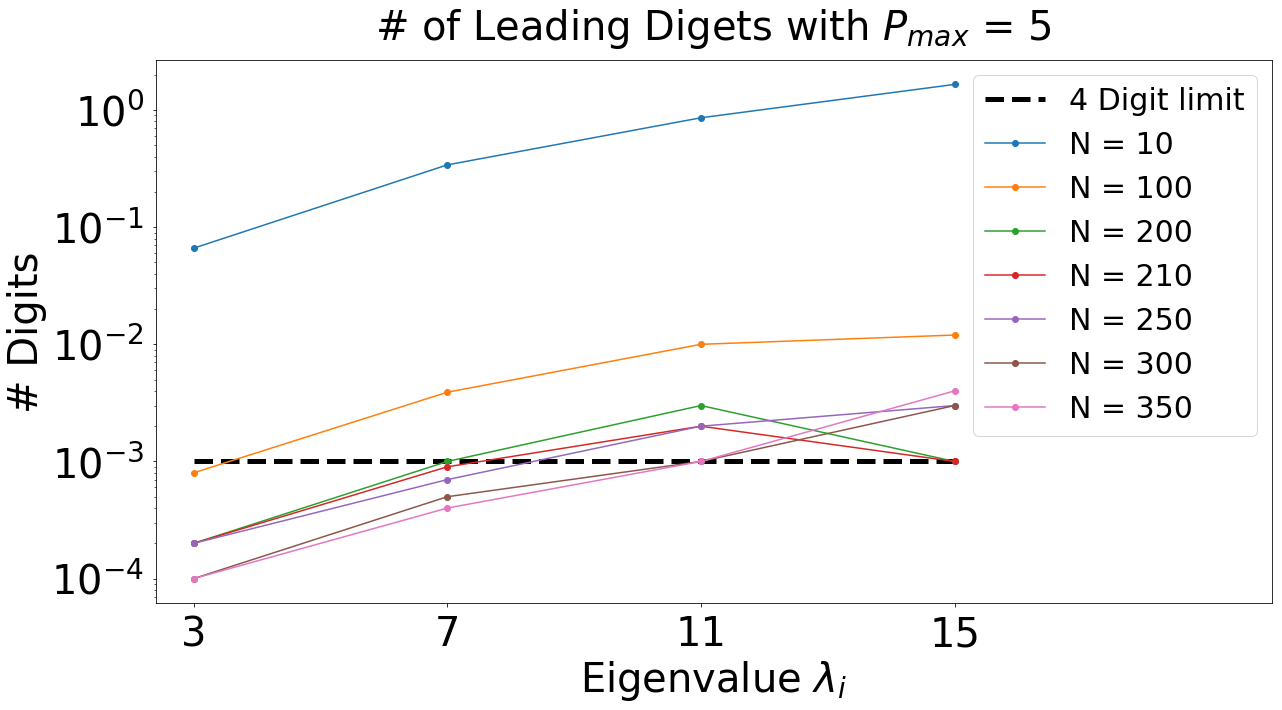

In [10]:
lim = 0.001
a = np.array([lim,lim,lim,lim])
b = np.array([3,7,11,15])

plt.figure(figsize = (20,10))
plt.semilogy(b,a,'--',lw = 5, c = 'k', label = '4 Digit limit')


for i in range(len(Data)):
    plt.semilogy(b,Data["digit_count"][i], '-o',label = 'N = ' + str(Data["N"][i]))

fsize = 40
plt.legend(loc = 'upper right', fontsize = fsize-10)
plt.xlabel("Eigenvalue $\lambda_i$", fontsize = fsize)
plt.ylabel("# Digits", fontsize = fsize)
plt.title("# of Leading Digets with $P_{max}$ = 5", fontsize = fsize)
plt.xticks(b, fontsize = fsize)
plt.yticks(fontsize = fsize)
plt.xlim(xmax = 20)

plt.savefig('Leading_digits.png')